In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [5]:
%reload_ext autoreload
%autoreload 2

In [181]:
voltage = 3.9

In [191]:
from scipy.optimize import leastsq
## assuming 1Hz, 10V amplitude
def get_mass(bb, charges):
    ff = np.mean(bb.Iz.reshape(2000,-1), axis=1)
    force = charges * 1.6e-19 * 2* 50 * voltage / 8.6e-3 * 0.63  # in Newtons
    masses = []
    for i in range(5,45):
        subset = ff[i*40:(i+1)*40]
        masses.append(2*np.mean(subset)/(np.min(subset)-np.max(subset))*force/9.8*1e15)
    return masses

def get_mass2(bb, charges):
    force = charges * 1.6e-19 * 2 * 50 * voltage / 8e-3 * 0.63  # in Newtons
    data = np.mean(bb.Iz.reshape(250000,-1), axis=1)
    data = data/np.mean(data)
    t = np.arange(len(data))*1/5000.

    optimize_func = lambda x: x[0]*np.sin(2*np.pi*t*[1]+x[2])+x[3] - data
    est_amp, est_freq, est_phase, est_shift = leastsq(optimize_func, [0.1, 1, 0.2,1])[0]
    print(est_amp, est_freq, est_phase, est_shift)
    return -1/est_amp*force/9.8*1e15

### Mass 0519

In [167]:
bdf_mass = load_dir(dirname='/data/new_trap/20200518/Bead2/Mass0519/', start_file=39, max_file=5, file_prefix='Mass')
# bdf_mass2 = load_dir(dirname='/data/new_trap/20200525/Bead2/Mass0526/', file_prefix='Mass')
# bdf_mass3 = load_dir(dirname='/data/new_trap/20200605/Bead1/Discharge/Discharge0608/', start_file=40, max_file=5, file_prefix='Discharge')
bdf_discharge = load_dir(dirname='/data/new_trap/20200518/Bead2/Discharge/Discharge0519/', file_prefix='Discharge')
# bdf_discharge2 = load_dir(dirname='/data/new_trap/20200525/Bead2/Discharge/Discharge0526/', start_file=0, file_prefix='Discharge')
# bdf_discharge2 = load_dir(dirname='/data/new_trap/20200605/Bead1/Discharge/Discharge0608/', start_file=116, file_prefix='Discharge')

45  files in folder
5  files loaded
458  files in folder
458  files loaded


In [155]:
bdf_mass[4].fname

'/data/new_trap/20200518/Bead2/Mass0519/Mass_46.h5'

In [168]:
file_i = np.array([int(bb.fname.split('_')[-1].split('.')[0]) for bb in bdf_discharge])

In [169]:
m2 = gfw.build_z_response(bdf_discharge, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=False)

***************************************************
Z2-amplitude:  9.87e+02
reduced chi2:  40066.68968911257
***************************************************
Z2-amplitude:  6.89e+02
reduced chi2:  16514.563631201767
***************************************************
Z2-amplitude:  8.64e+02
reduced chi2:  36089.49226088625
***************************************************
Z2-amplitude:  8.56e+02
reduced chi2:  10784.474837318516
***************************************************
Z2-amplitude:  7.96e+02
reduced chi2:  17519.80619600845
***************************************************
Z2-amplitude:  8.30e+02
reduced chi2:  24555.360021797806
***************************************************
Z2-amplitude:  8.59e+02
reduced chi2:  22540.370297969443
***************************************************
Z2-amplitude:  8.36e+02
reduced chi2:  17281.761435244927
***************************************************
Z2-amplitude:  8.15e+02
reduced chi2:  23941.18856669215
**************

***************************************************
Z2-amplitude:  6.38e+02
reduced chi2:  395.5750790953208
***************************************************
Z2-amplitude:  6.42e+02
reduced chi2:  309.54048867949257
***************************************************
Z2-amplitude:  6.47e+02
reduced chi2:  527.2783114911056
***************************************************
Z2-amplitude:  6.43e+02
reduced chi2:  545.0286323064125
***************************************************
Z2-amplitude:  6.58e+02
reduced chi2:  390.7094903100138
***************************************************
Z2-amplitude:  6.66e+02
reduced chi2:  418.007225851256
***************************************************
Z2-amplitude:  6.73e+02
reduced chi2:  599.1021122382839
***************************************************
Z2-amplitude:  6.20e+02
reduced chi2:  666.5711882405832
***************************************************
Z2-amplitude:  5.67e+02
reduced chi2:  328.85611904907717
******************

***************************************************
Z2-amplitude:  3.11e+02
reduced chi2:  231.45200416674223
***************************************************
Z2-amplitude:  3.13e+02
reduced chi2:  175.37235546941133
***************************************************
Z2-amplitude:  3.17e+02
reduced chi2:  245.24598249902877
***************************************************
Z2-amplitude:  3.08e+02
reduced chi2:  344.7569683482055
***************************************************
Z2-amplitude:  3.01e+02
reduced chi2:  604.298335241544
***************************************************
Z2-amplitude:  3.13e+02
reduced chi2:  463.8464310325251
***************************************************
Z2-amplitude:  3.03e+02
reduced chi2:  223.76011130061931
***************************************************
Z2-amplitude:  3.01e+02
reduced chi2:  298.32248512412417
***************************************************
Z2-amplitude:  3.04e+02
reduced chi2:  271.24818431303174
**************

reduced chi2:  308.6738641195897
***************************************************
Z2-amplitude:  9.64e+01
reduced chi2:  190.24830573385867
***************************************************
Z2-amplitude:  9.39e+01
reduced chi2:  246.6689762053454
***************************************************
Z2-amplitude:  1.01e+02
reduced chi2:  231.5445952465983
***************************************************
Z2-amplitude:  8.27e+01
reduced chi2:  239.0925072253714
***************************************************
Z2-amplitude:  9.44e+01
reduced chi2:  219.86302854675762
***************************************************
Z2-amplitude:  8.60e+01
reduced chi2:  187.2886337542667
***************************************************
Z2-amplitude:  1.91e+02
reduced chi2:  192.89487561531516
***************************************************
Z2-amplitude:  1.77e+02
reduced chi2:  341.9511762932229
***************************************************
Z2-amplitude:  1.77e+02
reduced chi2:  3

***************************************************
Z2-amplitude:  1.13e+02
reduced chi2:  470.010138270213
***************************************************
Z2-amplitude:  1.14e+02
reduced chi2:  328.2183432733756
***************************************************
Z2-amplitude:  1.14e+02
reduced chi2:  351.5750365189269
***************************************************
Z2-amplitude:  1.07e+02
reduced chi2:  494.8652644669511
***************************************************
Z2-amplitude:  1.14e+02
reduced chi2:  438.5199942731601
***************************************************
Z2-amplitude:  6.20e+01
reduced chi2:  154.34354933003715
***************************************************
Z2-amplitude:  5.31e+01
reduced chi2:  436.17602247805087
***************************************************
Z2-amplitude:  5.75e+01
reduced chi2:  357.86203943166294
***************************************************
Z2-amplitude:  5.19e+01
reduced chi2:  604.8644952571175
*****************

***************************************************
Z2-amplitude:  1.91e+02
reduced chi2:  329.5839857614687
***************************************************
Z2-amplitude:  1.86e+02
reduced chi2:  196.60702132968777
***************************************************
Z2-amplitude:  1.91e+02
reduced chi2:  267.1933583267361
***************************************************
Z2-amplitude:  1.77e+02
reduced chi2:  315.60027278578906
***************************************************
Z2-amplitude:  1.98e+02
reduced chi2:  270.5666344429032
***************************************************
Z2-amplitude:  2.03e+02
reduced chi2:  292.6837284944572
***************************************************
Z2-amplitude:  9.34e+01
reduced chi2:  351.2101432240475
***************************************************
Z2-amplitude:  4.94e+01
reduced chi2:  89.03845544063985
***************************************************
Z2-amplitude:  1.03e+02
reduced chi2:  237.67177750326
*******************

In [170]:
# phases = np.array([m_.values[2] for m_ in m4])
amps = np.array([m_.values[0] for m_ in m2])
# amps2 = np.array([m_.values[0] for m_ in m4])
# amps3 = np.array([m_.values[0] for m_ in m4])

<IPython.core.display.Javascript object>


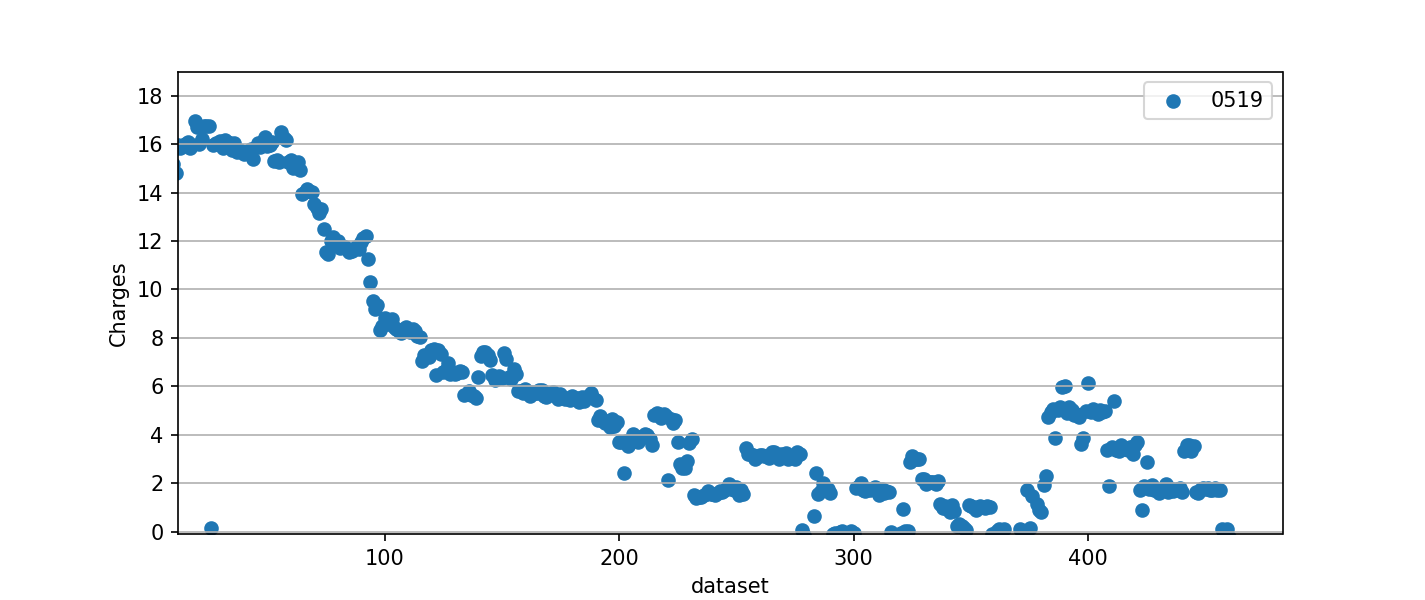

In [174]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 1.2

# Mass
ax.scatter(file_i, amps/scale/extra_scale, label='0519')
# ax.scatter(file_i, amps2/scale/extra_scale, label='fixed phase')
# ax.scatter(file_i, amps3/scale/extra_scale, label='not fixed')

ax.legend()
ax.set(xlabel='dataset', xlim=(12,None), ylabel='Charges', ylim=(-0.1,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [186]:
bb = bdf_mass[0]
charges=16
force = charges * 1.6e-19 * 2* 50 * voltage / 8.6e-3 * 0.63  # in Newtons
bb.fname

'/data/new_trap/20200518/Bead2/Mass0519/Mass_42.h5'

<IPython.core.display.Javascript object>


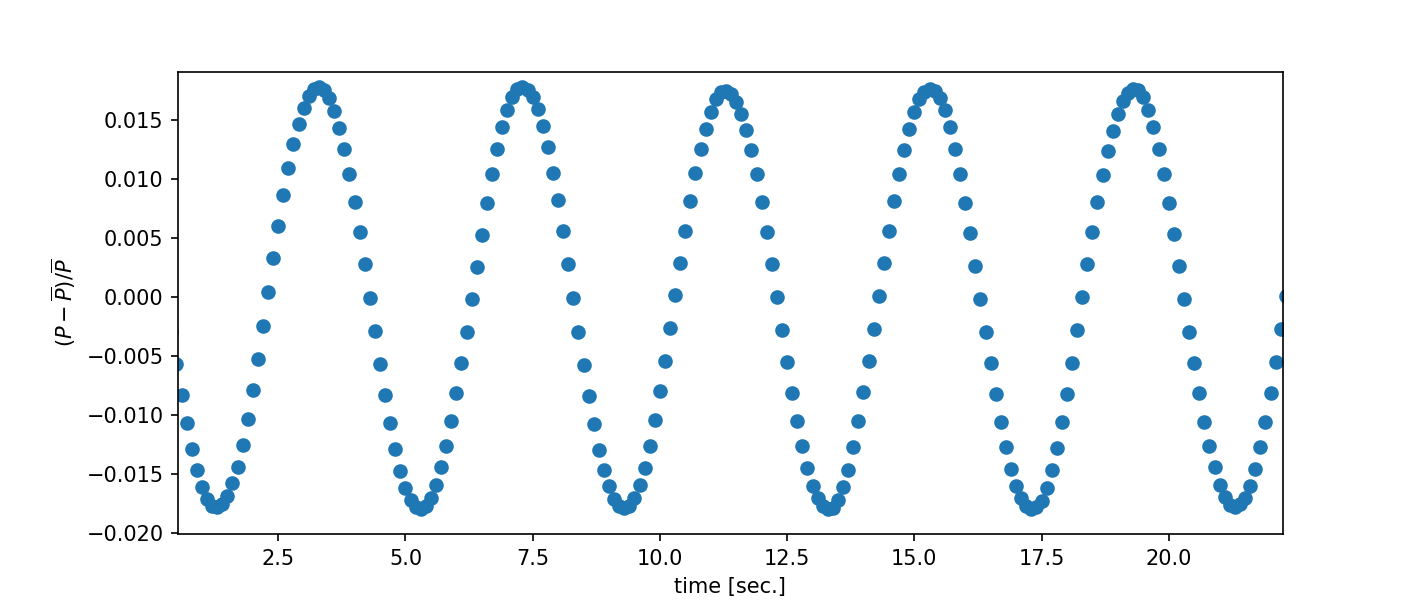

mass in pg:  150.43758218238952
power decrease [%] (peak to valley):  3.7207073601494396
force:  2.7426976744186044e-14


In [250]:
nroll = 0
ff = np.roll(np.mean(bb.Iz.reshape(2000,-1), axis=1), nroll)
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(np.arange(2000)*1/10, (ff-np.mean(ff))/np.mean(ff))
# ax.scatter(range(500), (sig-np.mean(sig))/np.std(sig))
ax.set(ylabel=r'$(P-\overline{P})/\overline{P}$', xlabel='time [sec.]')
print('mass in pg: ', 2*np.mean(ff)/(np.min(ff)-np.max(ff))*force/9.8*1e15) 
print('power decrease [%] (peak to valley): ', 100*(np.min(ff)-np.max(ff))/np.mean(ff))
print('force: ', force)

In [188]:
# bb.Iz.shape, 250000/1000, 5000/250
get_mass(bb, charges=16), np.std(get_mass(bb, charges=16))

([661.8332423607657,
  633.9577672847751,
  643.7856444705254,
  642.0880334090313,
  607.8123119585504,
  607.2879004751943,
  601.9803308425027,
  621.9566176411829,
  651.5086904272832,
  636.4513692432547,
  658.665992097547,
  626.2905763762506,
  643.5482466755436,
  650.4028496061205,
  628.3179194570992,
  640.9038861051557,
  636.9075641756993,
  638.7859788361883,
  627.3775133558356,
  607.0518113119327,
  625.271023353487,
  651.5460730007198,
  637.0164135812306,
  619.2647458744984,
  622.8355027054511,
  626.7657392499079,
  631.9920102280732,
  669.8159401628651,
  647.2506010426515,
  642.234076761932,
  613.8328719772188,
  622.4570130594349,
  635.1760848764169,
  626.4159904560771,
  671.9612013910976,
  663.105312751646,
  635.3224338415544,
  586.5062659364496,
  660.587088987204,
  647.0862210594585,
  671.6975255924773,
  622.305172458181,
  613.1409620089496,
  610.4799799302299,
  649.7000123930453,
  634.0899662351901,
  619.353598468307,
  630.8210855469118,

In [254]:
charges = 16
mass_mean = [np.mean(get_mass(bb, charges=charges)) for bb in bdf_mass]
mass_std = [np.std(get_mass(bb, charges=charges)) for bb in bdf_mass]

<IPython.core.display.Javascript object>


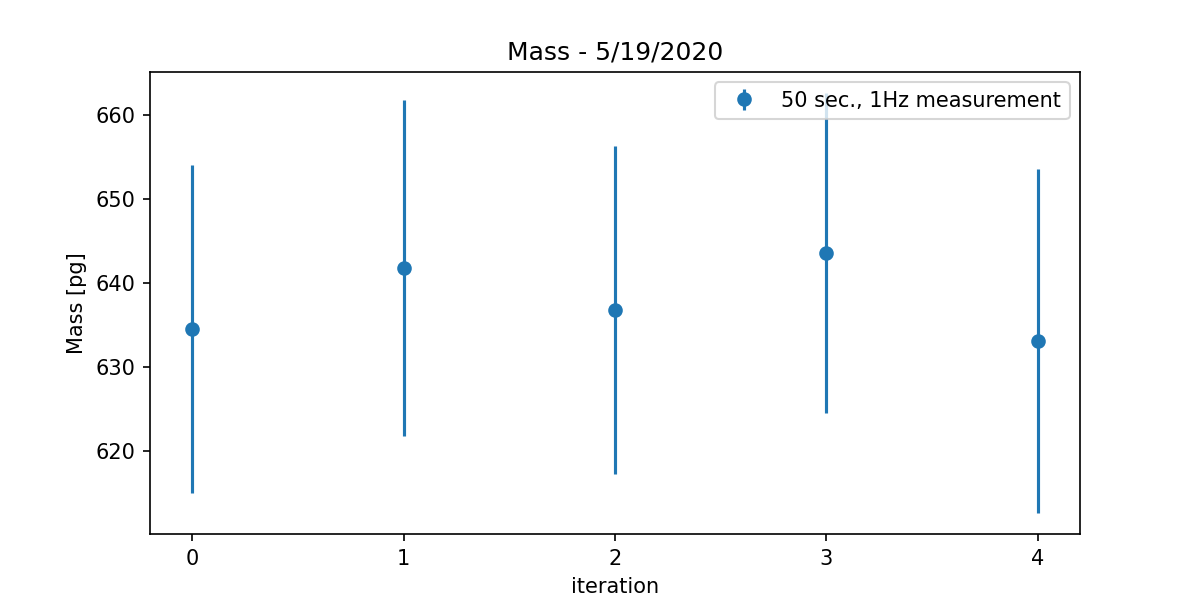

In [255]:
from matplotlib.ticker import MaxNLocator

_,ax = plt.subplots(figsize=(8,4))
ax.errorbar(range(5), mass_mean, yerr=mass_std/np.sqrt(1), fmt='o', label='50 sec., 1Hz measurement')
ax.legend()
ax.set(title='Mass - 5/19/2020', ylabel='Mass [pg]', xlabel='iteration')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

### Mass 0526

In [195]:
bdf_mass2 = load_dir(dirname='/data/new_trap/20200525/Bead2/Mass0526/', file_prefix='Mass')
bdf_discharge2 = load_dir(dirname='/data/new_trap/20200525/Bead2/Discharge/Discharge0526/', start_file=0, file_prefix='Discharge')

21  files in folder
21  files loaded
338  files in folder
338  files loaded


In [196]:
file_i2 = np.array([int(bb.fname.split('_')[-1].split('.')[0]) for bb in bdf_discharge2])

In [197]:
m3 = gfw.build_z_response(bdf_discharge2, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=False)

***************************************************
Z2-amplitude:  2.79e+02
reduced chi2:  622484.0489665727
***************************************************
Z2-amplitude:  9.64e+03
reduced chi2:  354537.9964716731
***************************************************
Z2-amplitude:  1.00e+04
reduced chi2:  560890.8520251164
***************************************************
Z2-amplitude:  1.02e+04
reduced chi2:  1164566.2722008098
***************************************************
Z2-amplitude:  1.00e+04
reduced chi2:  1160116.0563195217
***************************************************
Z2-amplitude:  1.00e+04
reduced chi2:  426719.1912001393
***************************************************
Z2-amplitude:  1.01e+04
reduced chi2:  805234.1730553061
***************************************************
Z2-amplitude:  1.04e+04
reduced chi2:  719095.6656058847
***************************************************
Z2-amplitude:  9.95e+03
reduced chi2:  592369.5850923149
*****************

***************************************************
Z2-amplitude:  7.57e+01
reduced chi2:  6217.999195743343
***************************************************
Z2-amplitude:  1.91e+03
reduced chi2:  13799.29085137056
***************************************************
Z2-amplitude:  1.87e+03
reduced chi2:  5829.32608049813
***************************************************
Z2-amplitude:  6.92e+00
reduced chi2:  145.59982764462168
***************************************************
Z2-amplitude:  2.50e+00
reduced chi2:  317.72285532572107
***************************************************
Z2-amplitude:  9.99e+00
reduced chi2:  206.10144983744576
***************************************************
Z2-amplitude:  5.67e-01
reduced chi2:  298.14532113273265
***************************************************
Z2-amplitude:  1.78e+03
reduced chi2:  11184.195615641333
***************************************************
Z2-amplitude:  2.99e+03
reduced chi2:  99507.98339957843
***************

***************************************************
Z2-amplitude:  1.17e+03
reduced chi2:  3512.4392409704215
***************************************************
Z2-amplitude:  1.18e+03
reduced chi2:  12960.476083916166
***************************************************
Z2-amplitude:  1.21e+03
reduced chi2:  8961.496550891357
***************************************************
Z2-amplitude:  1.23e+03
reduced chi2:  2850.793977314354
***************************************************
Z2-amplitude:  1.23e+03
reduced chi2:  4097.767170242932
***************************************************
Z2-amplitude:  1.20e+03
reduced chi2:  13349.022568206223
***************************************************
Z2-amplitude:  1.18e+03
reduced chi2:  4002.5625697960936
***************************************************
Z2-amplitude:  1.18e+03
reduced chi2:  2014.067555502142
***************************************************
Z2-amplitude:  1.19e+03
reduced chi2:  3732.8435836818503
**************

***************************************************
Z2-amplitude:  6.81e+02
reduced chi2:  2638.7217368867873
***************************************************
Z2-amplitude:  6.56e+02
reduced chi2:  3971.4279219399323
***************************************************
Z2-amplitude:  6.95e+02
reduced chi2:  2524.240094610913
***************************************************
Z2-amplitude:  6.97e+02
reduced chi2:  5714.680543125414
***************************************************
Z2-amplitude:  5.60e+02
reduced chi2:  1885.8894244048417
***************************************************
Z2-amplitude:  5.71e+02
reduced chi2:  4015.3102687931905
***************************************************
Z2-amplitude:  4.88e+02
reduced chi2:  2472.6630423087336
***************************************************
Z2-amplitude:  5.18e+02
reduced chi2:  1344.6613129720834
***************************************************
Z2-amplitude:  4.84e+02
reduced chi2:  1352.489726190432
*************

***************************************************
Z2-amplitude:  1.10e+02
reduced chi2:  413.38512815768
***************************************************
Z2-amplitude:  1.02e+02
reduced chi2:  217.27835900093302
***************************************************
Z2-amplitude:  1.05e+02
reduced chi2:  196.16676240808195
***************************************************
Z2-amplitude:  1.06e+02
reduced chi2:  165.04074241626813
***************************************************
Z2-amplitude:  1.16e+02
reduced chi2:  281.6688302201764
***************************************************
Z2-amplitude:  1.08e+02
reduced chi2:  537.5766838266737
Z2 response (amplitude): 2061.4411756536497


In [198]:
amps3 = np.array([m_.values[0] for m_ in m3])

<IPython.core.display.Javascript object>


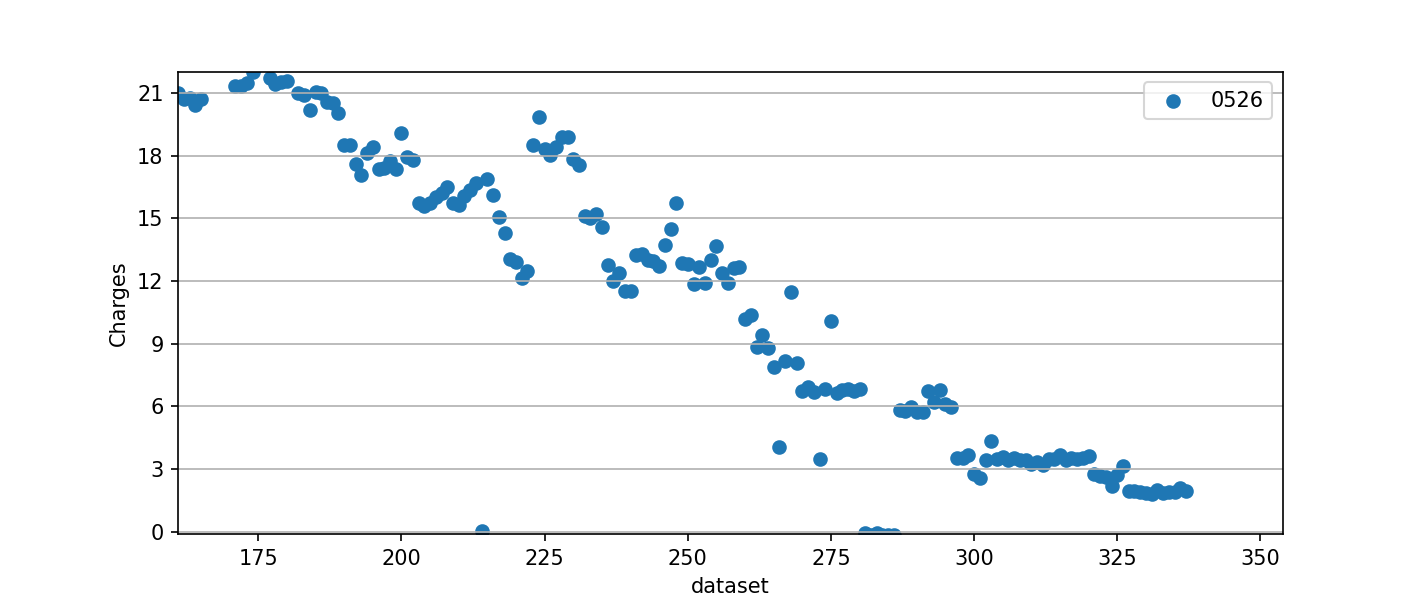

In [224]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 1.2

# Mass
ax.scatter(file_i2, amps3/scale/extra_scale, label='0526')
# ax.scatter(file_i, amps2/scale/extra_scale, label='fixed phase')
# ax.scatter(file_i, amps3/scale/extra_scale, label='not fixed')

ax.legend()
ax.set(xlabel='dataset', xlim=(161,None), ylabel='Charges', ylim=(-0.1,22))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [245]:
bb = bdf_mass2[11]
bb1 = bdf_mass2[16]
charges=6
force = charges * 1.6e-19 * 2* 50 * voltage / 8.6e-3 * 0.63  # in Newtons
bb.fname

'/data/new_trap/20200525/Bead2/Mass0526/Mass_11.h5'

<IPython.core.display.Javascript object>


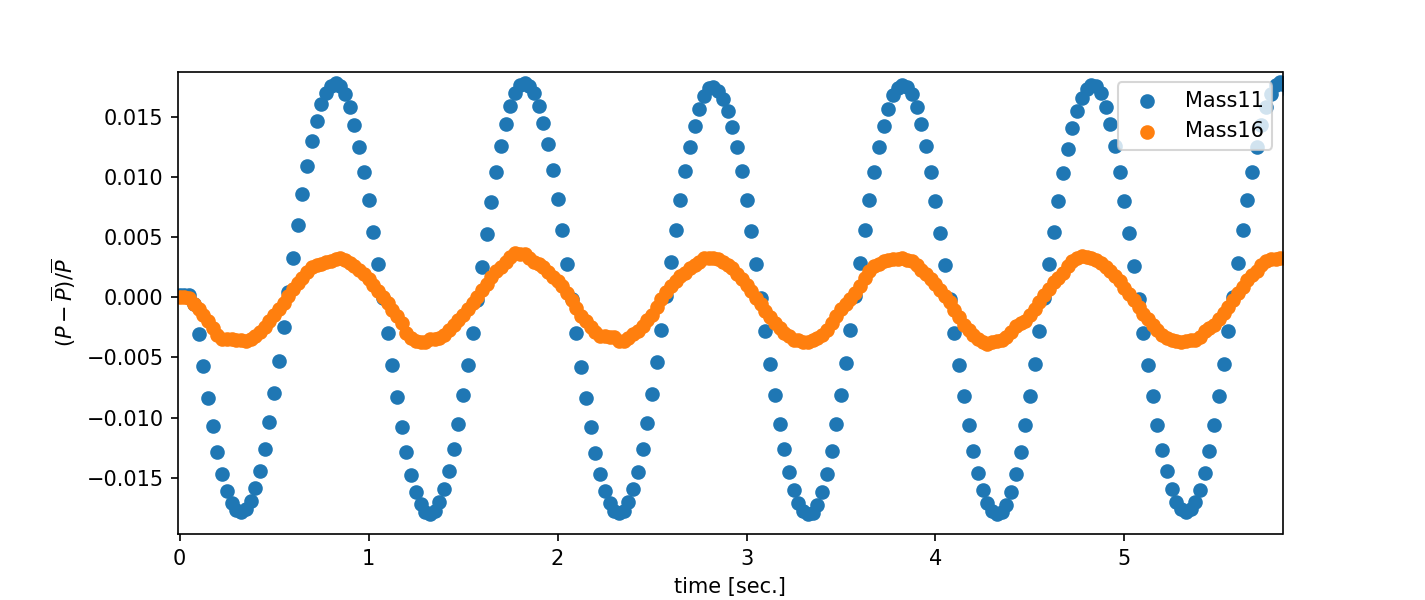

mass in pg:  150.43758218238952
power decrease [%] (peak to valley):  3.7207073601494396
force:  2.7426976744186044e-14


In [249]:
nroll = 0
ff = np.roll(np.mean(bb.Iz.reshape(2000,-1), axis=1), nroll)
ff1 = np.roll(np.mean(bb1.Iz.reshape(2000,-1), axis=1), nroll)
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(np.arange(2000)*1/40, (ff-np.mean(ff))/np.mean(ff), label='Mass11')
ax.scatter(np.arange(2000)*1/40, (ff1-np.mean(ff1))/np.mean(ff1), label='Mass16')
# ax.scatter(range(500), (sig-np.mean(sig))/np.std(sig))
ax.legend()
ax.set(ylabel=r'$(P-\overline{P})/\overline{P}$', xlabel='time [sec.]')
print('mass in pg: ', 2*np.mean(ff)/(np.min(ff)-np.max(ff))*force/9.8*1e15) 
print('power decrease [%] (peak to valley): ', 100*(np.min(ff)-np.max(ff))/np.mean(ff))
print('force: ', force)

In [268]:
charges = 21
mass_mean = [np.mean(get_mass(bb, charges=charges)) for bb in bdf_mass2[11:16]]
mass_std = [np.std(get_mass(bb, charges=charges)) for bb in bdf_mass2[11:16]]

In [238]:
charges = 4
mass_mean2 = [np.mean(get_mass(bb, charges=charges)) for bb in bdf_mass2[16:21]]
mass_std2 = [np.std(get_mass(bb, charges=charges)) for bb in bdf_mass2[16:21]]

<IPython.core.display.Javascript object>


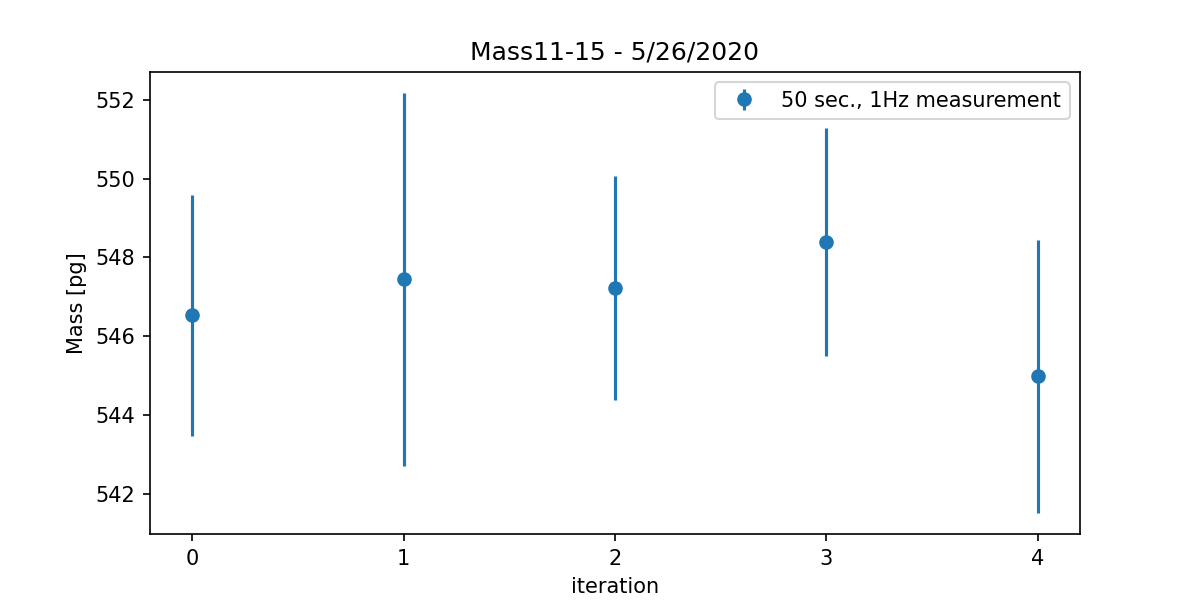

In [269]:
from matplotlib.ticker import MaxNLocator

_,ax = plt.subplots(figsize=(8,4))
ax.errorbar(range(5), mass_mean, yerr=mass_std/np.sqrt(1), fmt='o', label='50 sec., 1Hz measurement')
ax.legend()
ax.set(title='Mass11-15 - 5/26/2020', ylabel='Mass [pg]', xlabel='iteration')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

### Mass 0608

In [256]:
# bdf_mass3 = load_dir(dirname='/data/new_trap/20200605/Bead1/Discharge/Discharge0608/', start_file=40, max_file=5, file_prefix='Discharge')
bdf_discharge3 = load_dir(dirname='/data/new_trap/20200605/Bead1/Discharge/Discharge0608/', file_prefix='Discharge')

182  files in folder
182  files loaded


In [257]:
bdf_mass3 = bdf_discharge3[40:45]
bdf_mass4 = bdf_discharge3[111:116]

In [258]:
file_i3 = np.array([int(bb.fname.split('_')[-1].split('.')[0]) for bb in bdf_discharge3])

In [259]:
m4 = gfw.build_z_response(bdf_discharge3, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=False)

***************************************************
Z2-amplitude:  6.76e+02
reduced chi2:  508.64968373091324
***************************************************
Z2-amplitude:  4.27e+02
reduced chi2:  907.4423704859214
***************************************************
Z2-amplitude:  8.38e-01
reduced chi2:  81.40994749485888
***************************************************
Z2-amplitude:  1.17e+00
reduced chi2:  135.7700943620121
***************************************************
Z2-amplitude:  4.45e+01
reduced chi2:  67.72389869266824
***************************************************
Z2-amplitude:  4.23e+01
reduced chi2:  129.88379536570986
***************************************************
Z2-amplitude:  4.35e+01
reduced chi2:  224.95470844743468
***************************************************
Z2-amplitude:  3.21e+01
reduced chi2:  261.0808824068341
***************************************************
Z2-amplitude:  3.75e+01
reduced chi2:  173.3496967517896
****************

***************************************************
Z2-amplitude:  1.94e+01
reduced chi2:  179.18006697732386
***************************************************
Z2-amplitude:  2.50e+02
reduced chi2:  3265.6352742311174
***************************************************
Z2-amplitude:  4.23e+02
reduced chi2:  411.804853317662
***************************************************
Z2-amplitude:  4.88e+02
reduced chi2:  1484.9243908450333
***************************************************
Z2-amplitude:  4.02e+02
reduced chi2:  1069.3370413575244
***************************************************
Z2-amplitude:  4.43e+02
reduced chi2:  1699.9210416994997
***************************************************
Z2-amplitude:  4.06e+02
reduced chi2:  218.51818841309898
***************************************************
Z2-amplitude:  4.01e+02
reduced chi2:  342.8173635189521
***************************************************
Z2-amplitude:  3.29e+02
reduced chi2:  216.54321373781627
*************

***************************************************
Z2-amplitude:  2.38e+02
reduced chi2:  127.72970273922647
***************************************************
Z2-amplitude:  2.50e+02
reduced chi2:  245.44087118288022
***************************************************
Z2-amplitude:  2.43e+02
reduced chi2:  125.1310718248774
***************************************************
Z2-amplitude:  2.48e+02
reduced chi2:  114.96672267671437
***************************************************
Z2-amplitude:  1.61e+02
reduced chi2:  246.24763131860513
***************************************************
Z2-amplitude:  7.94e+01
reduced chi2:  158.19017870462906
***************************************************
Z2-amplitude:  8.05e+01
reduced chi2:  33.443693955597304
***************************************************
Z2-amplitude:  1.70e+02
reduced chi2:  143.9119920560461
***************************************************
Z2-amplitude:  1.63e+02
reduced chi2:  149.75140208306445
************

In [260]:
amps4 = np.array([m_.values[0] for m_ in m4])

<IPython.core.display.Javascript object>


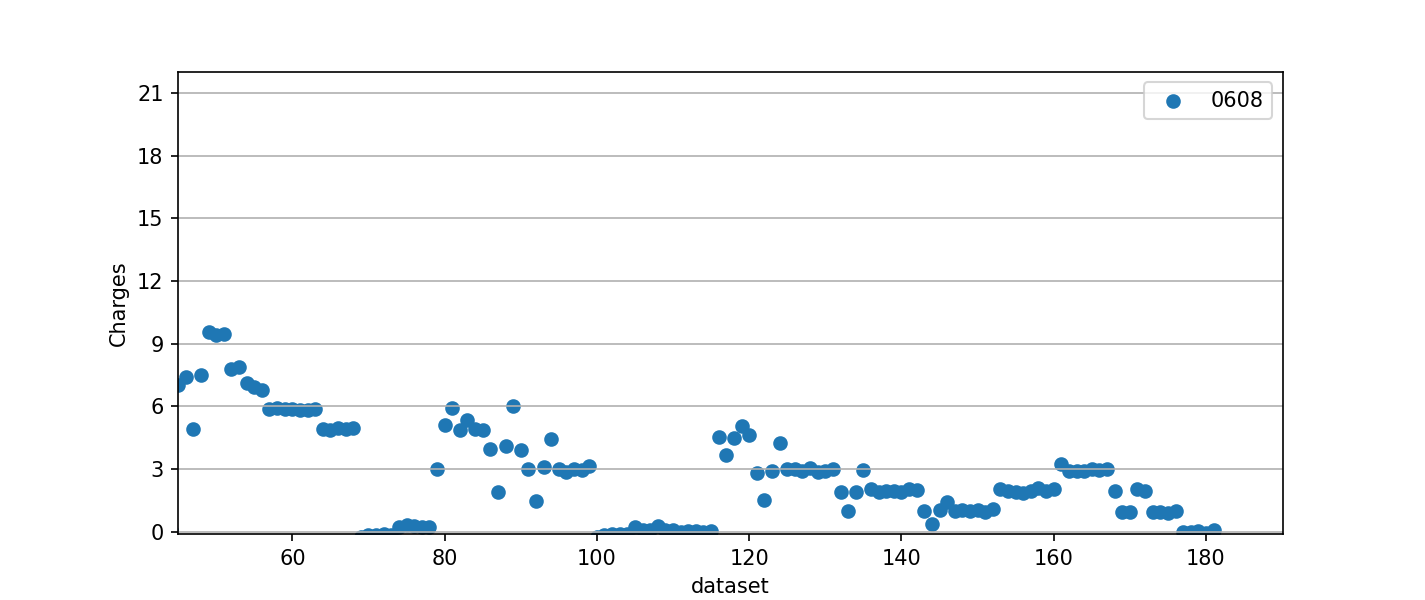

In [264]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 1.8

# Mass
ax.scatter(file_i3, amps4/scale/extra_scale, label='0608')
# ax.scatter(file_i, amps2/scale/extra_scale, label='fixed phase')
# ax.scatter(file_i, amps3/scale/extra_scale, label='not fixed')

ax.legend()
ax.set(xlabel='dataset', xlim=(45,None), ylabel='Charges', ylim=(-0.1,22))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [265]:
bb = bdf_mass3[0]
bb1 = bdf_mass4[0]
charges=6
force = charges * 1.6e-19 * 2* 50 * voltage / 8.6e-3 * 0.63  # in Newtons
bb.fname

'/data/new_trap/20200605/Bead1/Discharge/Discharge0608/Discharge_40.h5'

<IPython.core.display.Javascript object>


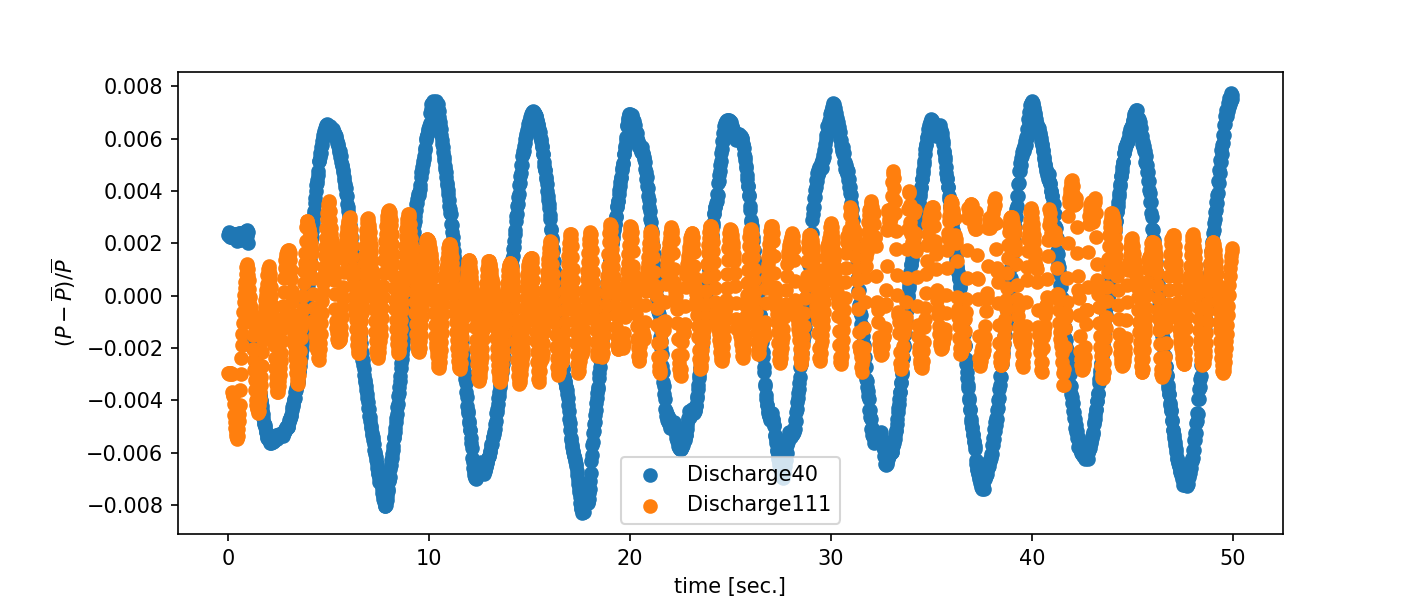

mass in pg:  348.48867793358954
power decrease [%] (peak to valley):  1.606176196564325
force:  2.7426976744186044e-14


In [272]:
nroll = 0
ff = np.roll(np.mean(bb.Iz.reshape(2000,-1), axis=1), nroll)
ff1 = np.roll(np.mean(bb1.Iz.reshape(2000,-1), axis=1), nroll)
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(np.arange(2000)*1/40, (ff-np.mean(ff))/np.mean(ff), label='Discharge40')
ax.scatter(np.arange(2000)*1/40, (ff1-np.mean(ff1))/np.mean(ff1), label='Discharge111')
# ax.scatter(range(500), (sig-np.mean(sig))/np.std(sig))
ax.legend()
ax.set(ylabel=r'$(P-\overline{P})/\overline{P}$', xlabel='time [sec.]')
print('mass in pg: ', 2*np.mean(ff)/(np.min(ff)-np.max(ff))*force/9.8*1e15) 
print('power decrease [%] (peak to valley): ', 100*(np.min(ff)-np.max(ff))/np.mean(ff))
print('force: ', force)

In [267]:
charges = 4
mass_mean3 = [np.mean(get_mass(bb, charges=charges)) for bb in bdf_mass4]
mass_std3 = [np.std(get_mass(bb, charges=charges)) for bb in bdf_mass4]

<IPython.core.display.Javascript object>


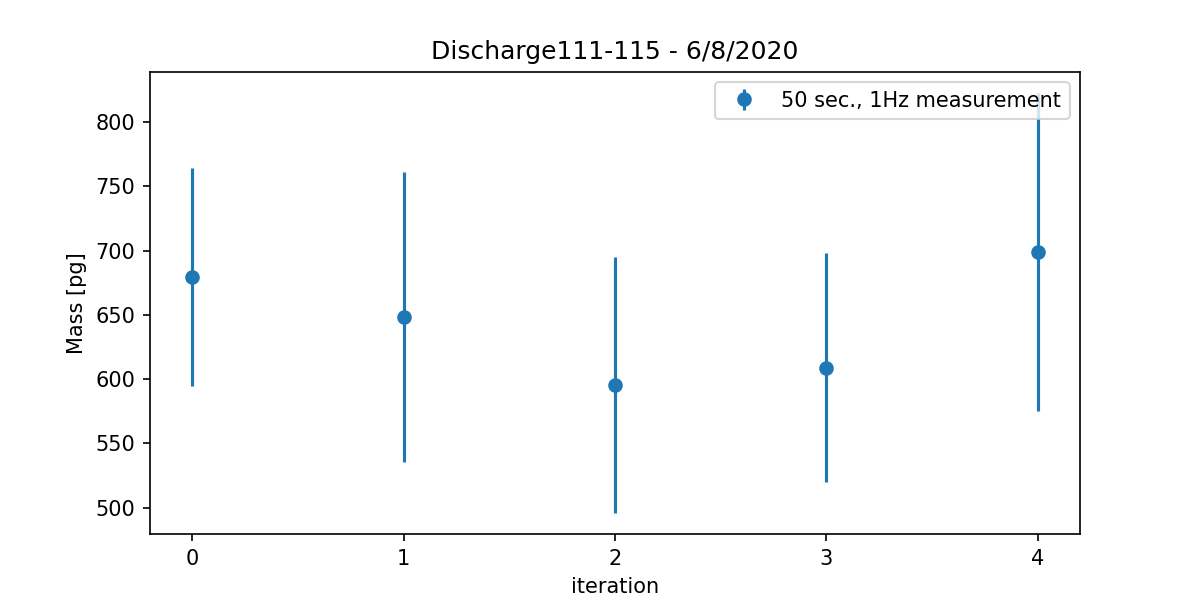

In [273]:
from matplotlib.ticker import MaxNLocator

_,ax = plt.subplots(figsize=(8,4))
ax.errorbar(range(5), mass_mean3, yerr=mass_std3/np.sqrt(1), fmt='o', label='50 sec., 1Hz measurement')
ax.legend()
ax.set(title='Discharge111-115 - 6/8/2020', ylabel='Mass [pg]', xlabel='iteration')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))